In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import datetime
from pandas_datareader import data as pdr
import ivolat3

In [41]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2019,1,1)
end = datetime.date.today()

# use quandl for american stocks

# use datareader for european stocks
besi = pdr.DataReader('BESI.AS','yahoo',start,end)
sp500 = pdr.DataReader('^GSPC','yahoo',start,end)


In [59]:
besi_stock =pd.DataFrame({
    'BESI Close': besi['Adj Close']
})
sig =np.std(besi_stock)
sig

BESI Close    2.364528
dtype: float64

In [43]:
sp500_df = pd.DataFrame({
    "SP500 Adj Close":sp500['Adj Close']
})

In [60]:
s = besi_stock.iloc[-1]
k = 22
r = 0.003
q = 0.1
t = 14/365
sigma = sig


In [61]:
p = ivolat3.prem_call(s,k,r,q,t,sigma)
p

3.2507434965614976

In [62]:
ivolat3.ivolat_call(s, k, r, q, t, p)

2.3645280998812397

In [64]:
c =besi_stock.mean()

In [65]:
c+ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    23.994615
dtype: float64

In [66]:
c-ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    19.265559
dtype: float64

(array([0.00539821, 0.        , 0.        , 0.00539821, 0.01619464,
        0.01619464, 0.01079643, 0.00539821, 0.01619464, 0.01619464,
        0.01079643, 0.0377875 , 0.05398215, 0.05938036, 0.11336251,
        0.09716787, 0.06477858, 0.09716787, 0.1079643 , 0.13495537,
        0.1457518 , 0.15115002, 0.19433574, 0.16194645, 0.16194645,
        0.1457518 , 0.22132681, 0.15115002, 0.16734466, 0.1457518 ,
        0.22132681, 0.07557501, 0.13495537, 0.06477858, 0.06477858,
        0.09176965, 0.04318572, 0.08097322, 0.04318572, 0.04318572,
        0.02699107, 0.02699107, 0.01619464, 0.01079643, 0.01619464,
        0.01079643, 0.00539821, 0.00539821, 0.00539821, 0.00539821]),
 array([14.48581971, 14.77081421, 15.0558087 , 15.3408032 , 15.6257977 ,
        15.9107922 , 16.1957867 , 16.48078119, 16.76577569, 17.05077019,
        17.33576469, 17.62075918, 17.90575368, 18.19074818, 18.47574268,
        18.76073717, 19.04573167, 19.33072617, 19.61572067, 19.90071517,
        20.18570966, 20.47

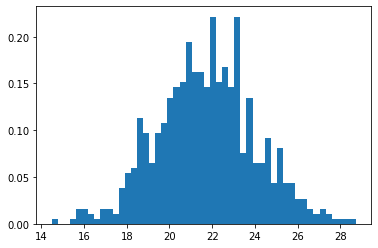

In [82]:
mu = c


d = np.random.normal(mu,sigma,650)
plt.hist(d, 50, density=True)

In [81]:
vv =0.00442325+ 0.00884651+ 0.00884651+0.00442325+0.00884651+0.00884651+ 0.02211627+ 0.01326976+ 0.0486558 + 0.03096278+0.08846509+ 0.08404184+ 0.0530790

vv

0.38482308